# Machine Exercise 5

<style>
:root {
    --highlight-question-bg: #51ff00ff; /* Define the background color variable */
    --highlight-answer-bg: #ecec94ff;
}
.question {
    background-color: var(--highlight-question-bg);
    padding: 2px 4px;
    border-radius: 4px;
}
.answer {
    background-color: var(--highlight-answer-bg); 
    padding: 2px 4px;
    border-radius: 4px;
}
</style>

## Part 1: Country Data from HELP International 

### 1.I. Load Dataset

In [1]:
# Source Code From : https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Country-data.csv" 

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rohan0301/unsupervised-learning-on-country-data",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documentation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

C:\Users\jhon\AppData\Local\Temp\ipykernel_20780\2839170658.py:11: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:                country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


In [2]:
# Prompt: Store Features and Target Variable
X = df.drop(columns=['country'])
Y = df['country']

### 1.II. K-Means

<mark class="question"> Item 1.a. Normalize the features data using Standard Scaler. Then, perform K-means clustering 
on all features. Display the elbow plot (Inertia vs. no. of clusters) and the silhouette score plot. 
What number of clusters is recommended?</mark>

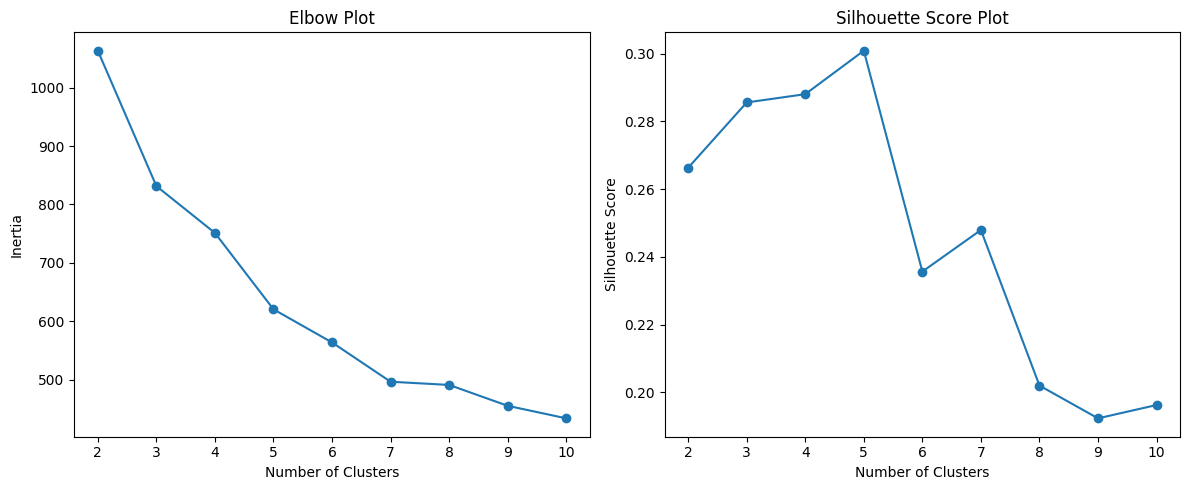

In [3]:
# Prompt: Normalize the features of X using StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

import matplotlib.pyplot as plt

# Define the range for the number of clusters
cluster_range = range(2, 11)
inertia = []
silhouette_scores = []

# Perform KMeans clustering for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

    
def plot_elbow_and_silhouette(cluster_range, inertia, silhouette_scores):
    # Plot the elbow plot (Inertia vs. number of clusters)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(cluster_range, inertia, marker='o')
    plt.title('Elbow Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

    # Plot the silhouette score plot
    plt.subplot(1, 2, 2)
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title('Silhouette Score Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')

    plt.tight_layout()
    plt.show()

# Call the function
plot_elbow_and_silhouette(cluster_range, inertia, silhouette_scores)



<mark class="question"> Item 1.a. What number of clusters is recommended? 

<mark class="answer"> Based on the elbow plot and Silhouette Score, the recommended number of clusters is either 5 or 7. For both 5 and 7 clusters, the Silhouette Score increases, indicating that the data points are well-clustered and distinct from other clusters. The elbow plot shows the relationship between the number of clusters and the inertia. At 7 clusters, the rate of decrease in inertia slows down significantly compared to 5 clusters.

<mark class="answer"> If I were to choose only one, I would select 7 clusters.

###  1.III. Hierarchical clustering

<mark class="question"> Item 1.b. Perform hierarchical clustering on the normalized data set and compare the results of various linkage methods. Which one would you recommend? Why is this recommended clustering informative?

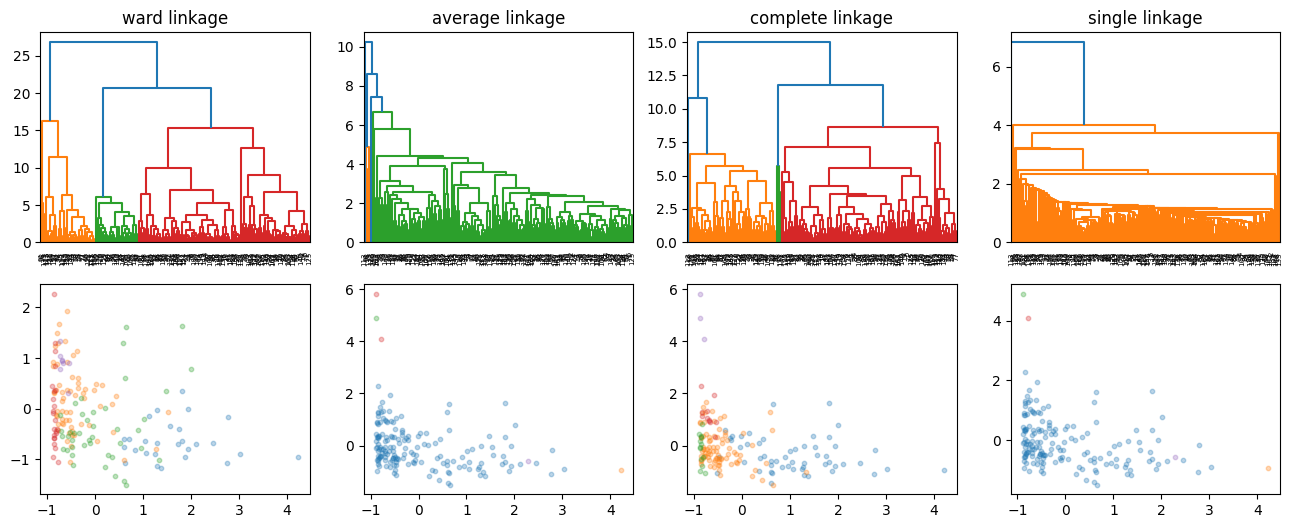

Elapsed Time: 3.20088267326355 sec


In [4]:
# Soure Code is From AI221 Github Repository: AI221\Clustering_Anomaly_Detect\kmeans_agglo_blobs.ipynb
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from time import time

fig3 = plt.figure(figsize=(16,6))
ctr = 1
t0 = time()
for method in ('ward', 'average', 'complete', 'single'):
    Z = linkage(X_scaled, method=method)
    ax = fig3.add_subplot(240 + ctr)
    ax.set_title("%s linkage" % method)
    dendrogram(Z)
    cutree = cut_tree(Z, n_clusters=7).flatten()
    ax = fig3.add_subplot(240 + ctr + 4)
    for j in range(0,5):
        ax.scatter(X_scaled[cutree == j,0], X_scaled[cutree == j,1], s=10, alpha=0.3)
    ctr += 1

plt.show()
print(f"Elapsed Time: {time()-t0} sec")

<mark class='question'> Item 1.b. Which one would you recommend? Why is this recommended clustering informative? 

<mark class='answer'>  I recommend using the Ward linkage method. For this analysis, I set cut_tree to 7 clusters to align with my response to the previous item. The visualization demonstrates that the Ward linkage method is more informative compared to other methods. Ward linkage minimizes the variance within clusters, resulting in compact and well-separated clusters. This makes it particularly effective when the data has a Gaussian-like distribution or when compact clusters are desired. The method ensures that the clusters formed are homogeneous and interpretable, making it a suitable choice for this dataset.

### 1.IV. PCA (2 features) + K-means


<mark class="question"> Item 1.c. This time, perform PCA to reduce the features data into 2D. Then, perform K-means clustering on the reduced data set just as in item (a). Display the elbow plot and silhouette score plot as well. 

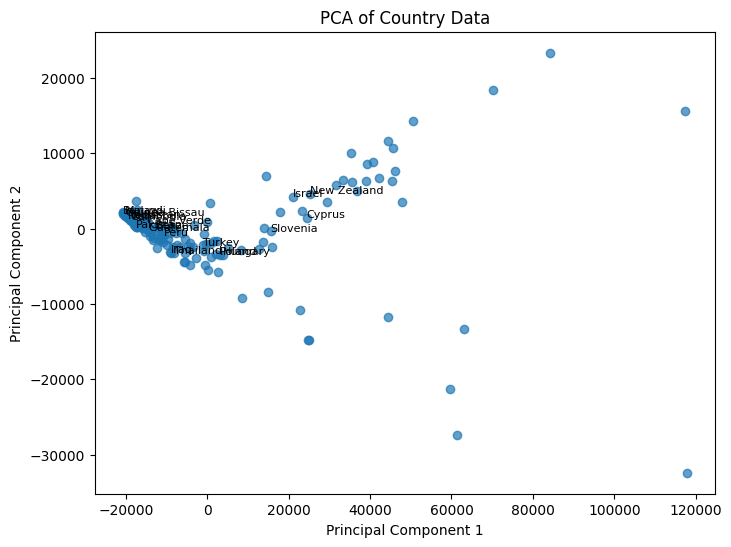

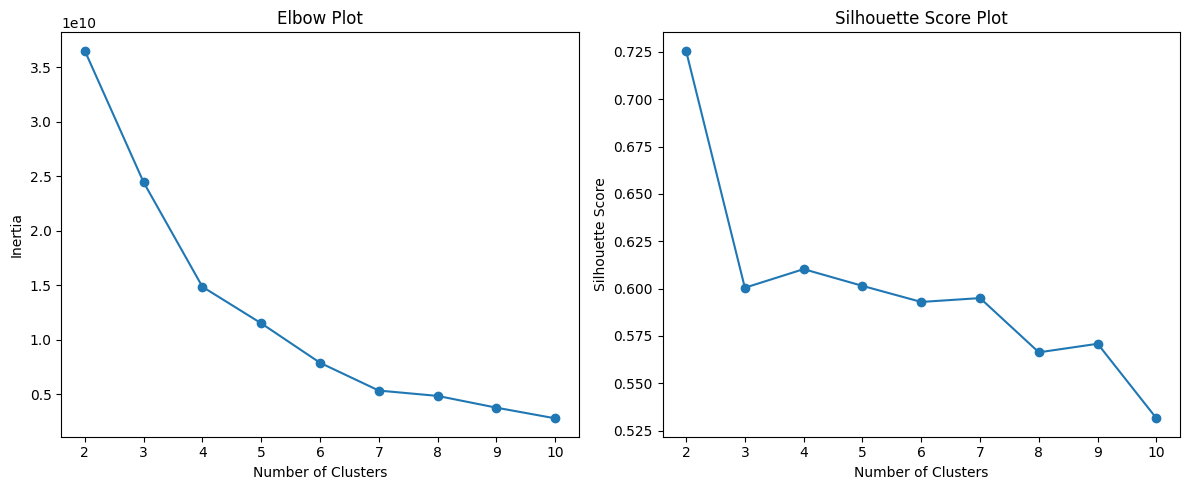

In [5]:
# Prompt: Perform PCA on X to reduce its dimensions to 2 components
from sklearn.decomposition import PCA
import random
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Prompt: Display a scatter plot of the PCA-reduced data with some points labeled
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
# Prompt: Randomly select some countries to label
selected_countries = random.sample(list(df['country']), 20)


for i, country in enumerate(df['country']):
    if country in selected_countries:
        plt.text(X_pca[i, 0], X_pca[i, 1], s=country, fontsize=8)
plt.title('PCA of Country Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
# Repeat KMeans clustering on PCA-reduced data
cluster_range = range(2, 11)
inertia = []
silhouette_scores = []




# Perform KMeans clustering for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

    

plot_elbow_and_silhouette(cluster_range, inertia, silhouette_scores)
    


<mark class="question"> Item 1.c. What number of clusters is recommended? You can label some countries in the 2D mapping.

<mark class="answer"> I would recommend 7 clusters as it is the number where the elbow plot shows a significant decrease in inertia. Additionally, the Silhouette score for 7 clusters is higher than that of its neighboring cluster numbers, indicating well-defined and distinct clusters.

<mark class='question'> Item 1.d. Based on the recommended no. of clusters in item (b), make your own descriptions of each cluster. What range of values of features are unique to each cluster?


<mark class='answer'> To support my answer, let me get insights from the table, and plots below. I will base my descriptions on the mean values of the feature variables for each cluster. Below are the descriptions for each cluster:

- **Cluster 1**: This cluster is characterized by high health values (10.51) and low inflation (1.33). These countries likely have strong healthcare systems and stable economies.
- **Cluster 2**: Defined by the lowest income (3017.69), life expectancy (59.04), and GDP per capita (1455.76). These countries may face significant economic and health challenges.
- **Cluster 3**: Notable for the highest child mortality (130.00), inflation (104.00), and fertility rates (5.84). These countries may have developing economies with high population growth.
- **Cluster 4**: Distinguished by the highest exports (176.00), imports (156.67), life expectancy (81.43), and GDP per capita (57566.67). These countries are likely developed nations with strong trade and high standards of living.
- **Cluster 5**: Characterized by the highest income (67171.43) and lowest health values (3.28). These countries may have high wealth but face challenges in healthcare access or outcomes.
- **Cluster 0**: Represents countries with average values across most features, indicating balanced development without extremes in any specific area.
- **Cluster 6**: Defined by unique outliers or anomalies in the dataset, possibly representing countries with rare or exceptional conditions not captured by other clusters.
</mark>

The following blocks of code support the analysis by providing detailed insights into the clustering results:

- Mean Values of Features for Each Cluster: The code calculates the mean values of each feature for every cluster, allowing us to identify patterns and differences across clusters.

- Box Plots for Feature Distributions: The code generates box plots to visualize the distribution of each feature within the clusters. This helps in understanding the variability and spread of the data for each feature across different clusters.

- Clusters with Highest and Lowest Mean Values: The code identifies which cluster has the highest and lowest mean value for each feature, highlighting the distinguishing characteristics of the clusters.

- Visualization of Cluster Grouping: Finally, the code includes a plot that visually represents how the clusters group as the number of clusters increases. This provides a clear picture of the clustering structure and how the data is segmented.



,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster,,,,,,,,,
0,29.430435,30.621500,5.569565,33.577520,10946.956522,10.601435,71.139130,2.590652,5526.000000
1,4.295652,40.730435,10.513478,38.247826,40265.217391,1.334913,80.891304,1.810870,45417.391304
2,96.009524,27.988333,6.334286,43.811905,3017.690476,9.820357,59.042857,5.129286,1455.761905
3,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000
4,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
5,10.700000,65.557143,3.281429,38.700000,67171.428571,12.517143,76.928571,2.287143,34057.142857
6,15.306667,51.824444,7.238889,62.400000,14206.888889,3.771511,73.928889,2.001556,8703.244444


None


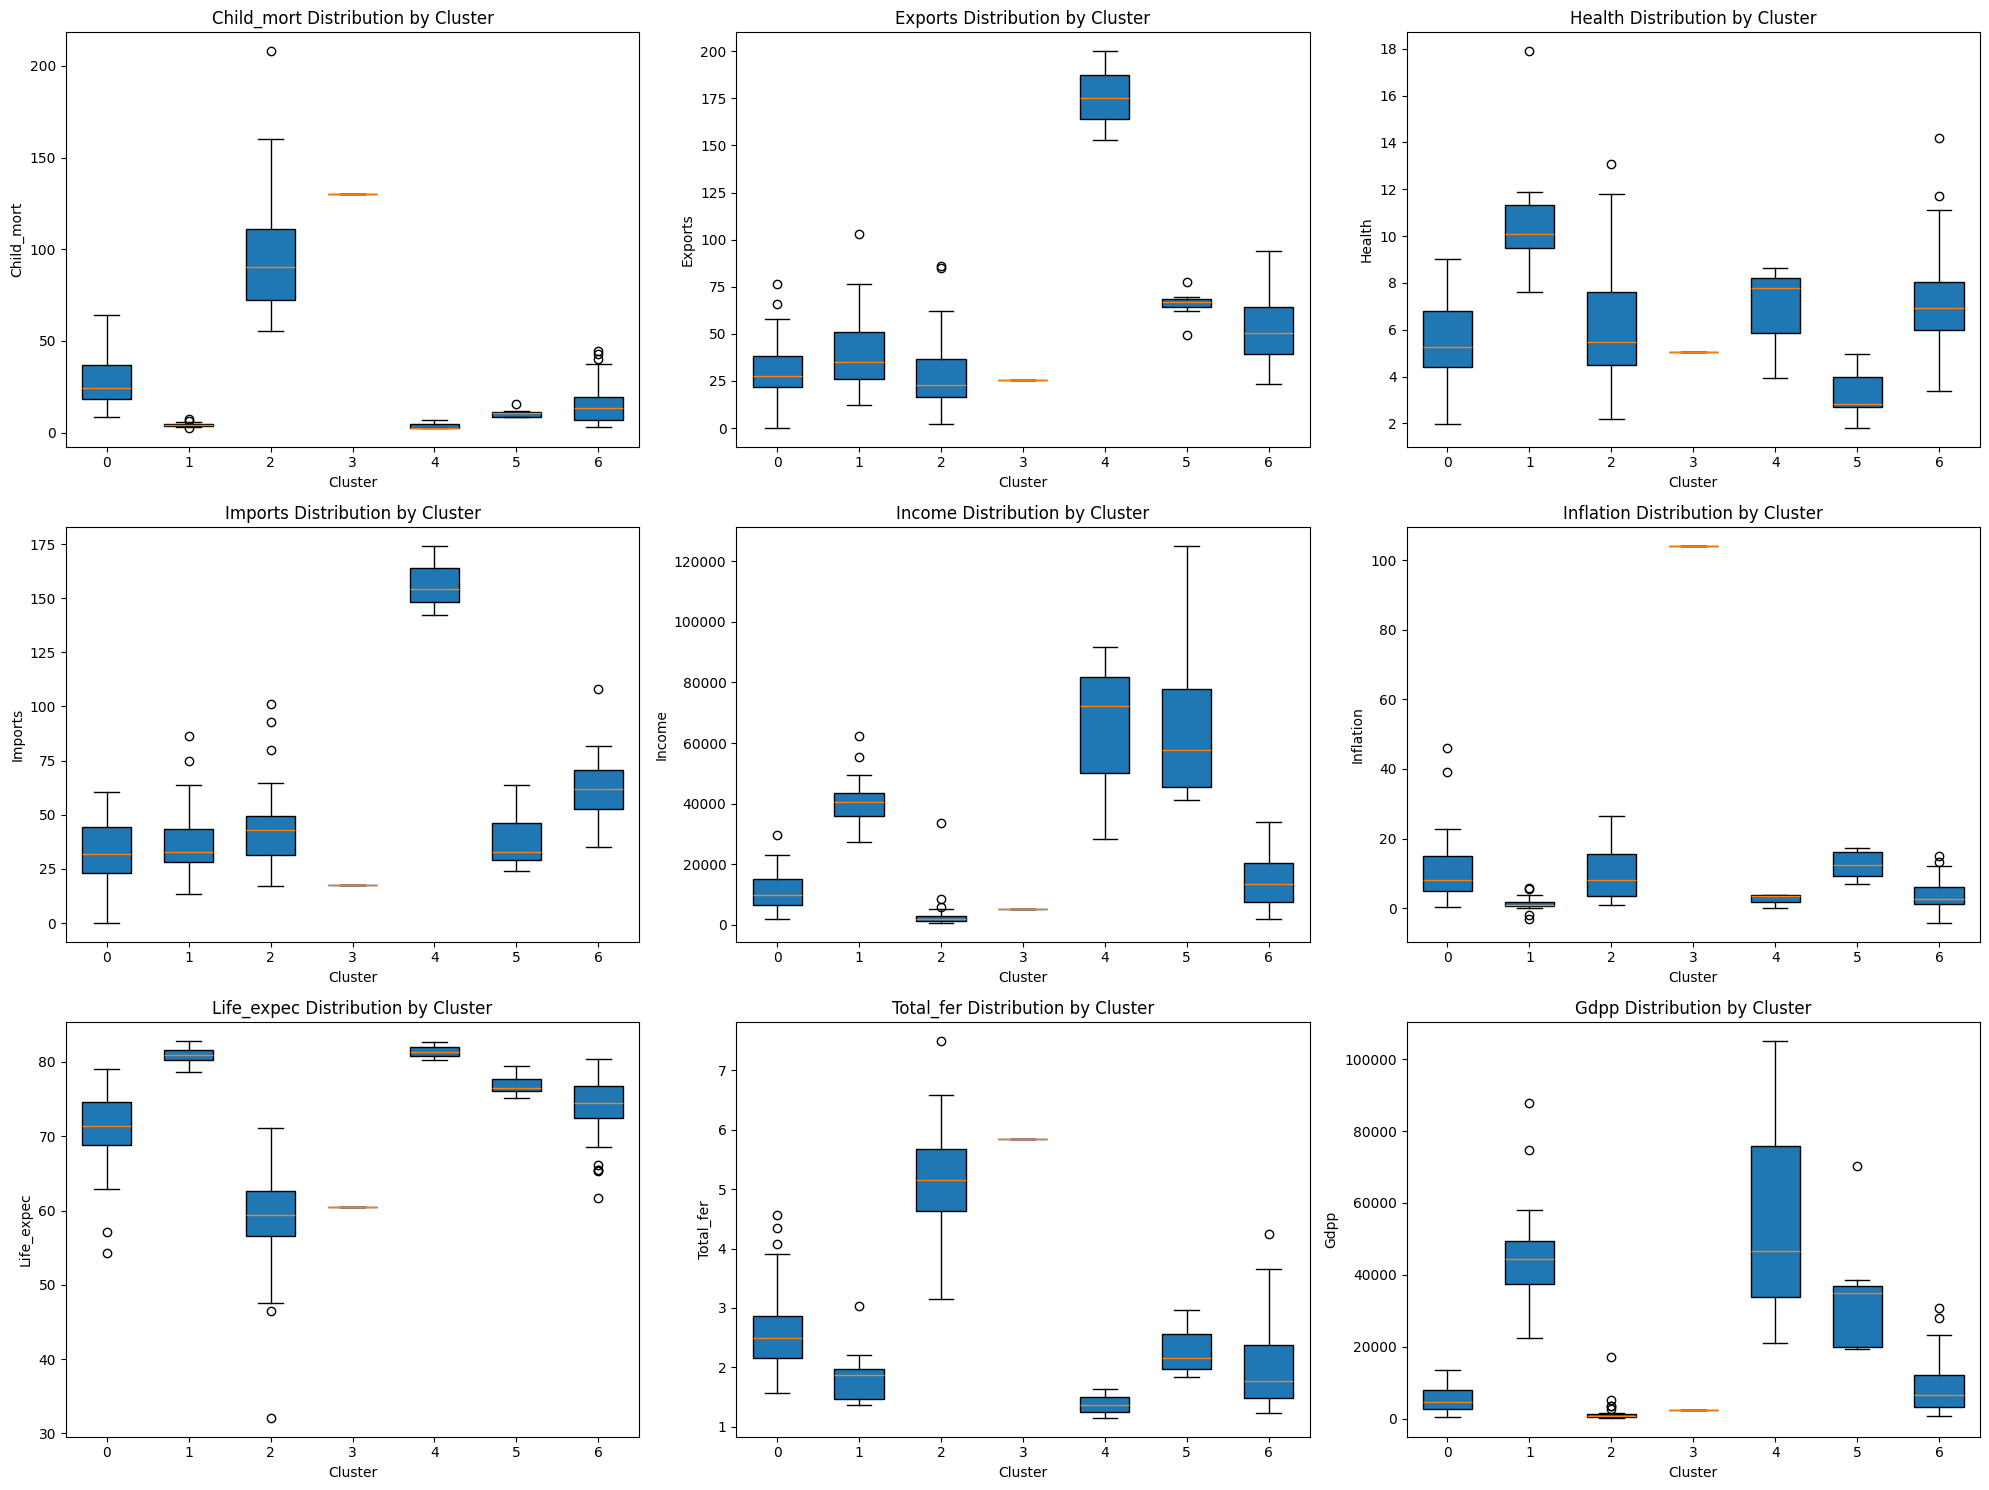

Feature: child_mort
  Highest Cluster: 3 (Value: 130.00)
  Lowest Cluster: 4 (Value: 4.13)
Feature: exports
  Highest Cluster: 4 (Value: 176.00)
  Lowest Cluster: 3 (Value: 25.30)
Feature: health
  Highest Cluster: 1 (Value: 10.51)
  Lowest Cluster: 5 (Value: 3.28)
Feature: imports
  Highest Cluster: 4 (Value: 156.67)
  Lowest Cluster: 3 (Value: 17.40)
Feature: income
  Highest Cluster: 5 (Value: 67171.43)
  Lowest Cluster: 2 (Value: 3017.69)
Feature: inflation
  Highest Cluster: 3 (Value: 104.00)
  Lowest Cluster: 1 (Value: 1.33)
Feature: life_expec
  Highest Cluster: 4 (Value: 81.43)
  Lowest Cluster: 2 (Value: 59.04)
Feature: total_fer
  Highest Cluster: 3 (Value: 5.84)
  Lowest Cluster: 4 (Value: 1.38)
Feature: gdpp
  Highest Cluster: 4 (Value: 57566.67)
  Lowest Cluster: 2 (Value: 1455.76)


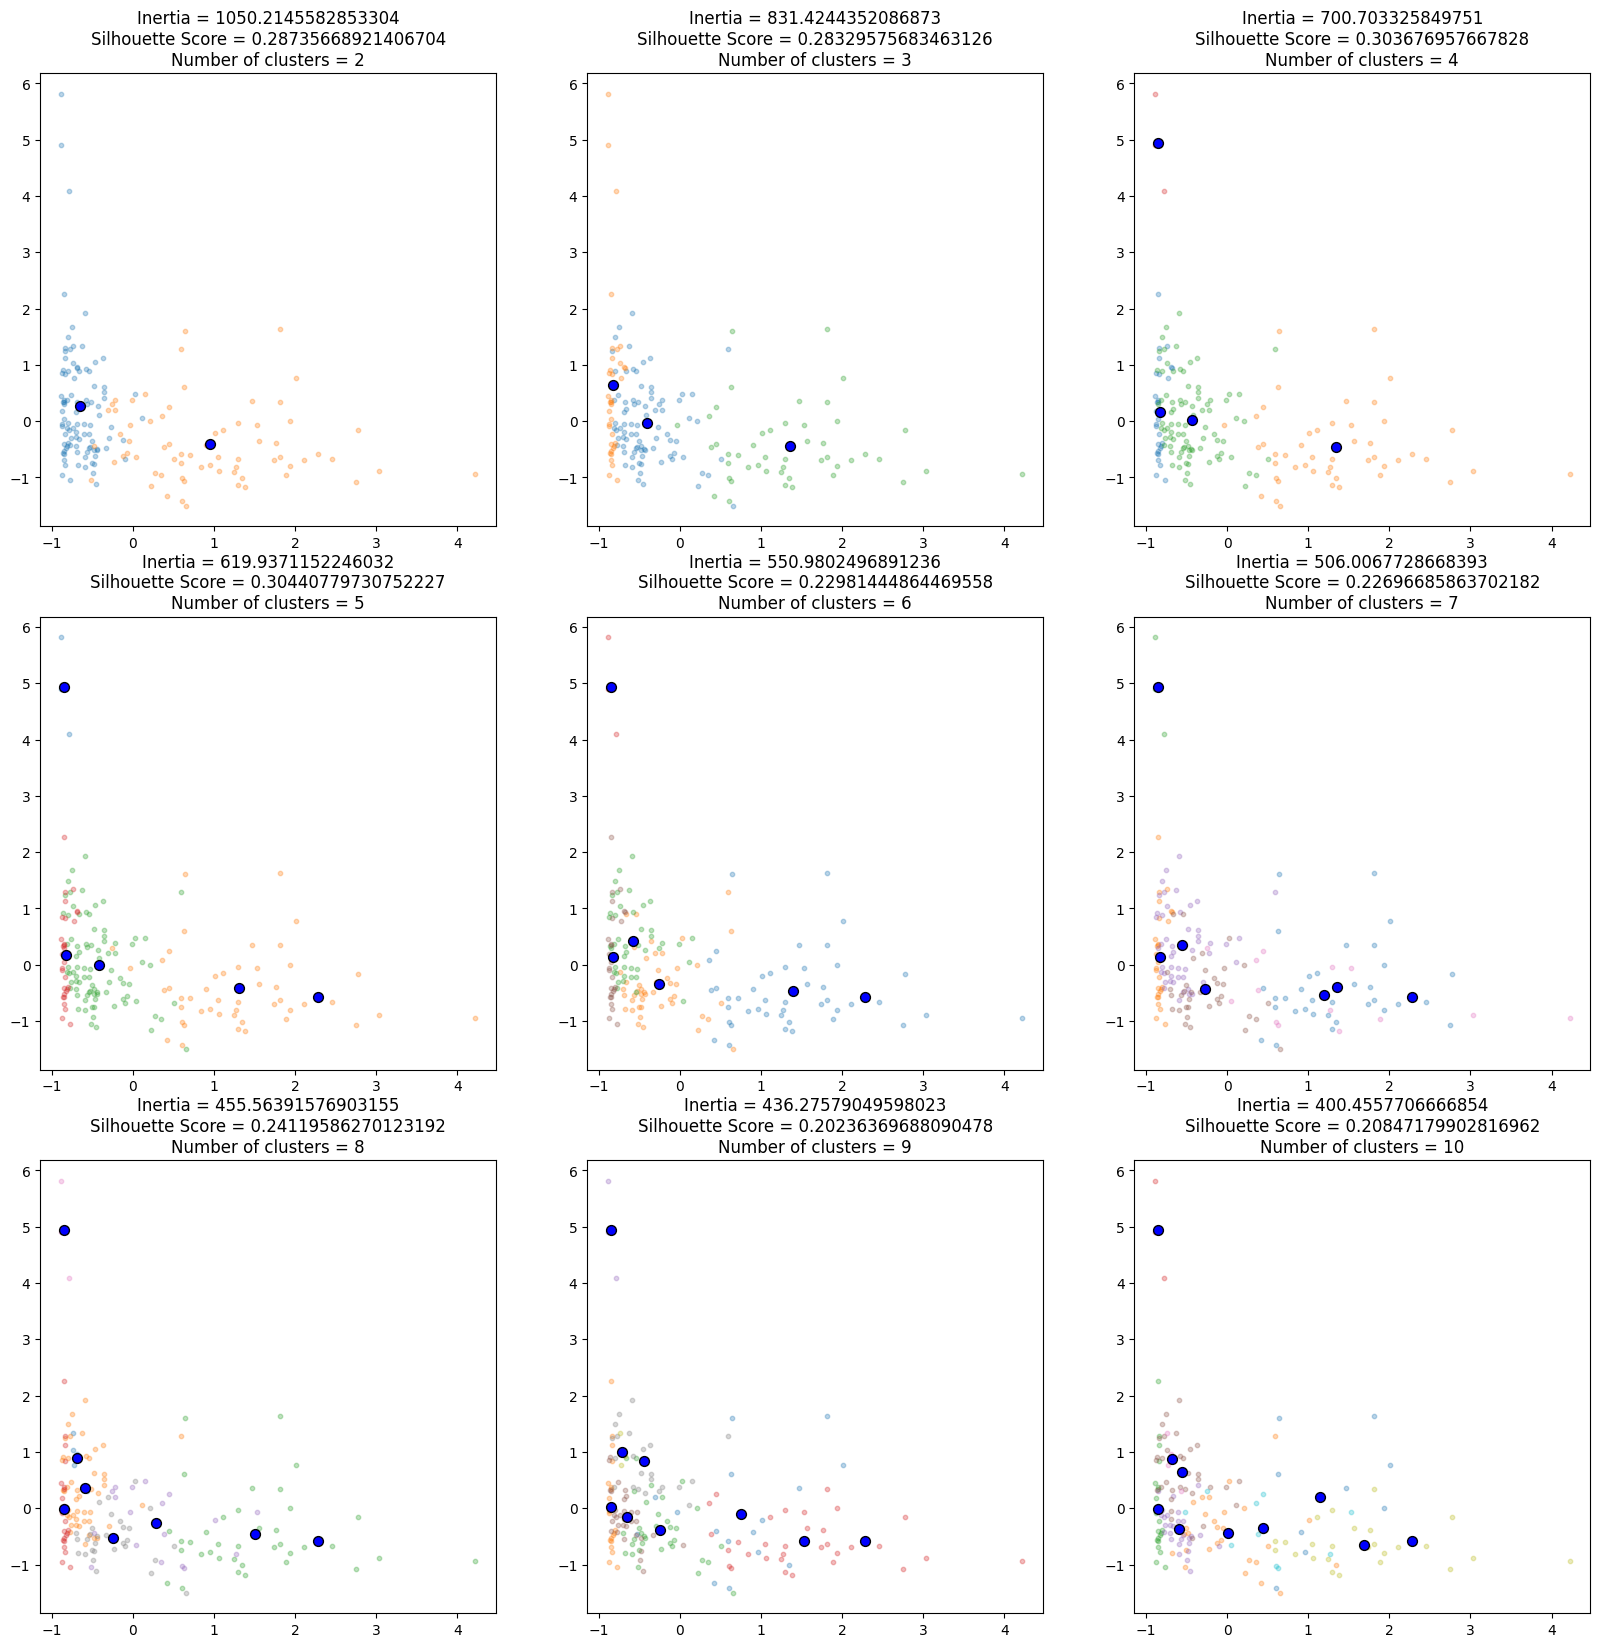

In [6]:
import seaborn as sns

cluster_labels = KMeans(n_clusters=7, random_state=42).fit_predict(X_scaled)
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = cluster_labels  # Add cluster labels to the DataFrame
cluster_summary = df_with_clusters.drop(columns=['country']).groupby('Cluster').agg(['mean'])
print(display(cluster_summary))

# Prompt: Plot all feature distributions by cluster in the same figure
plt.figure(figsize=(20, 15))
num_features = len(df_with_clusters.columns[1:-1])  # Exclude 'country' and 'Cluster' columns
for i, feature in enumerate(df_with_clusters.columns[1:-1], 1):
    plt.subplot((num_features + 2) // 3, 3, i)  # Arrange subplots in a grid
    for cluster in sorted(df_with_clusters['Cluster'].unique()):
        cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster]
        plt.boxplot(cluster_data[feature], positions=[cluster], widths=0.6, patch_artist=True)
    plt.title(f'{feature.capitalize()} Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature.capitalize())

plt.tight_layout()
plt.show()

# Prompt: Determine which cluster has the highest and lowest values for each column
highest_lowest_clusters = {}

for column in df_with_clusters.columns[1:-1]:  # Exclude 'country' and 'Cluster' columns
    cluster_means = df_with_clusters.groupby('Cluster')[column].mean()
    highest_cluster = cluster_means.idxmax()
    lowest_cluster = cluster_means.idxmin()
    highest_lowest_clusters[column] = {
        'highest_cluster': highest_cluster,
        'highest_value': cluster_means[highest_cluster],
        'lowest_cluster': lowest_cluster,
        'lowest_value': cluster_means[lowest_cluster]
    }

# Display the results
for feature, clusters in highest_lowest_clusters.items():
    print(f"Feature: {feature}")
    print(f"  Highest Cluster: {clusters['highest_cluster']} (Value: {clusters['highest_value']:.2f})")
    print(f"  Lowest Cluster: {clusters['lowest_cluster']} (Value: {clusters['lowest_value']:.2f})")


# Prompt: Visualize KMeans clustering results for cluster counts from 2 to 10
inertia_values = []
silhouette_avgs = []
fig2 = plt.figure(figsize=(20,20))
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(X_scaled)
    cluster_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia_values.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    ax = fig2.add_subplot(330 + i - 1)
    for j in range(0,i):
        ax.scatter(X_scaled[cluster_labels == j,0], X_scaled[cluster_labels == j,1], s=10, alpha=0.3)
    ax.scatter(centroids[:,0],centroids[:,1], s=50, color='b', edgecolor='k')
    ax.set_title(f"Inertia = {kmeans.inertia_}\nSilhouette Score = {silhouette_avg}\nNumber of clusters = {i}")

### 1.V. 2D PCA  + Anomaly Detetion

<mark class='question'> Item 1.e. Based on the 2D PCA mapping, perform anomaly detection using any method. </mark>

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KernelDensity
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
from sklearn.svm import OneClassSVM

#### 1.V.a. Elliptic Envelope

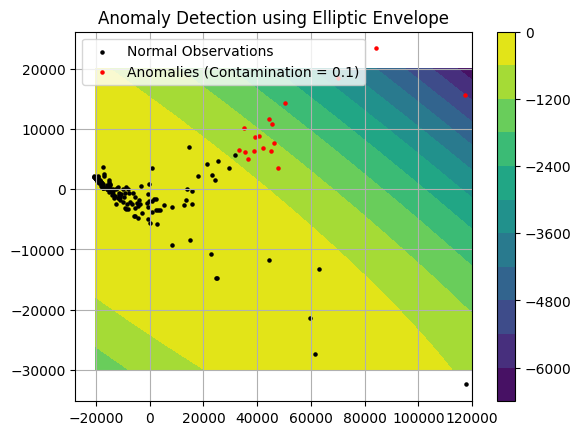

In [9]:
# Source Code is From AI221 Github Repository: AI221\Clustering_Anomaly_Detect\anomaly_detect_methods.ipynb
Xp, Yp = np.meshgrid(np.linspace(-20000,120000),np.linspace(-30000,20000))
XY = np.vstack([Xp.ravel(), Yp.ravel()]).T

envelope = EllipticEnvelope(random_state=0, contamination=0.1).fit(X_pca)
Zp = envelope.score_samples(XY)
Zp = Zp.reshape(Xp.shape)

# Get the anomalous data points
y_pred = envelope.predict(X_pca)
normals = X_pca[y_pred == 1,:]
anomals = X_pca[y_pred == -1,:]

cntr = plt.contourf(Xp, Yp, Zp, levels=10, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (Contamination = 0.1)')
plt.title('Anomaly Detection using Elliptic Envelope')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

envelope_anomalies = df.iloc[np.where(y_pred == -1)[0]]

#### 1.V.b Kernel Density

Threshold (KDE) = 0.012569474629724105


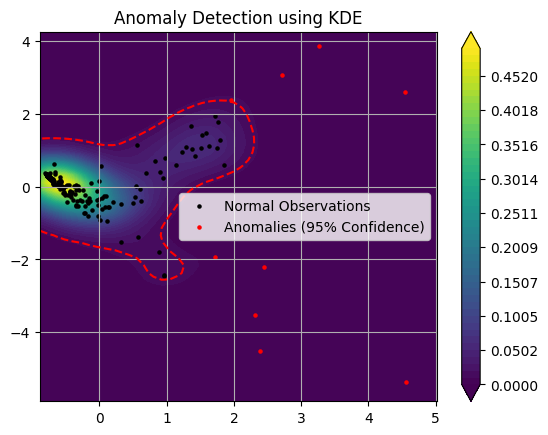

In [10]:
# Source Code is From AI221 Github Repository: AI221\Clustering_Anomaly_Detect\anomaly_detect_methods.ipynb
# Generate the KDE surface as Z
X_pca_scaled  = scaler.fit_transform(X_pca)
kde = KernelDensity(kernel='gaussian',bandwidth=0.4).fit(X_pca_scaled)


Xp, Yp = np.meshgrid(
    np.linspace(X_pca_scaled[:, 0].min() * 1.1, X_pca_scaled[:, 0].max() * 1.1, 50),
    np.linspace(X_pca_scaled[:, 1].min() * 1.1, X_pca_scaled[:, 1].max() * 1.1, 50)
)
XY = np.vstack([Xp.ravel(), Yp.ravel()]).T

Zp = np.exp(kde.score_samples(XY))
Zp = Zp.reshape(Xp.shape)

# Establish a confidence level of 95% (or 5% cutoff) 
# for the UCL using the quantile of kde_scores.
scores = kde.score_samples(X_pca_scaled)
threshold = np.quantile(scores,0.05)
print(f"Threshold (KDE) = {np.exp(threshold)}")

# Get the anomalous data points
normals = X_pca_scaled[scores > threshold,:]
anomals = X_pca_scaled[scores <= threshold,:]

cntr = plt.contourf(Xp, Yp, Zp, levels=np.linspace(Zp.min(), Zp.max(), 50), cmap='viridis', extend='both')
plt.contour(Xp, Yp, Zp, levels=[np.exp(threshold)], colors='red', linestyles='dashed', linewidths=1.5)
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (95% Confidence)')
plt.title('Anomaly Detection using KDE')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

kernel_density_anomalies = df.iloc[np.where(scores <= threshold)[0]]

#### 1.V.c. One Class SVM

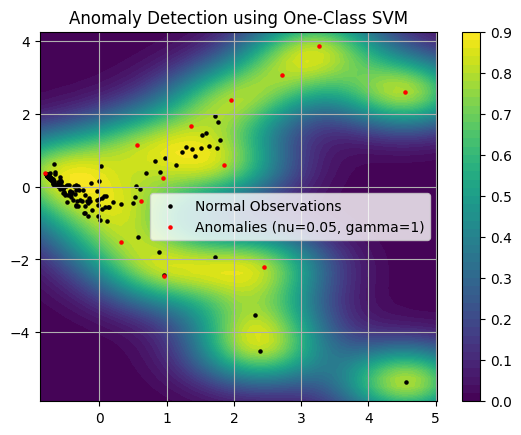

In [11]:
# Source Code is From AI221 Github Repository: AI221\Clustering_Anomaly_Detect\anomaly_detect_methods.ipynb
ocsvm = OneClassSVM(nu=0.05, gamma=1).fit(X_pca_scaled)
Zp = ocsvm.score_samples(XY)
Zp = Zp.reshape(Xp.shape)

# Get the anomalous data points
y_pred = ocsvm.predict(X_pca_scaled)
normals = X_pca_scaled[y_pred == 1,:]
anomals = X_pca_scaled[y_pred == -1,:]

cntr = plt.contourf(Xp, Yp, Zp, levels=50, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (nu=0.05, gamma=1)')
plt.title('Anomaly Detection using One-Class SVM')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

ocsvm_anomalies = df.iloc[np.where(y_pred == -1)[0]]

#### 1.V.d. Local Outlier Factor

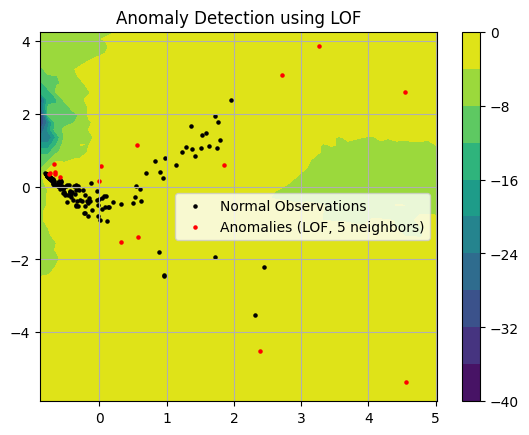

In [12]:
# Source Code is From AI221 Github Repository: AI221\Clustering_Anomaly_Detect\anomaly_detect_methods.ipynb
lof = LocalOutlierFactor(n_neighbors=5,novelty=True).fit(X_pca_scaled)
Zp = lof.score_samples(XY)
Zp = Zp.reshape(Xp.shape)

# Get the anomalous data points
y_pred = lof.predict(X_pca_scaled)
normals = X_pca_scaled[y_pred == 1,:]
anomals = X_pca_scaled[y_pred == -1,:]

cntr = plt.contourf(Xp, Yp, Zp, levels=10, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (LOF, 5 neighbors)')
plt.title('Anomaly Detection using LOF')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

lof_anomalies = df.iloc[np.where(y_pred == -1)[0]]

#### 1.V.e. Isolation Forest

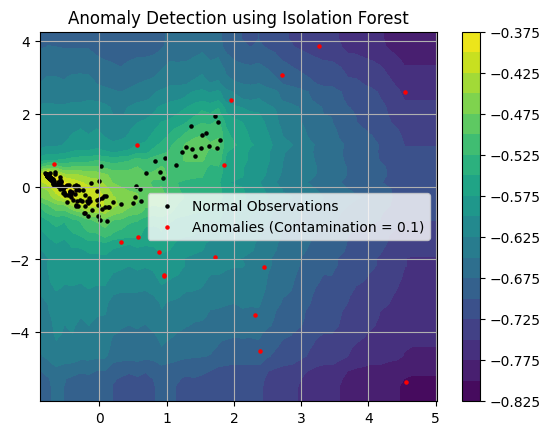

In [13]:
# Source Code is From AI221 Github Repository: AI221\Clustering_Anomaly_Detect\anomaly_detect_methods.ipynb
isoforest = IsolationForest(contamination=0.1).fit(X_pca_scaled)
Zp = isoforest.score_samples(XY)
Zp = Zp.reshape(Xp.shape)

# Get the anomalous data points
y_pred = isoforest.predict(X_pca_scaled)
normals = X_pca_scaled[y_pred == 1,:]
anomals = X_pca_scaled[y_pred == -1,:]

cntr = plt.contourf(Xp, Yp, Zp, levels=20, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (Contamination = 0.1)')
plt.title('Anomaly Detection using Isolation Forest')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

isoforest_anomalies = df.iloc[np.where(y_pred == -1)[0]]

<mark class="question"> Item 1.e. Which countries are deemed to be outliers and why? Which features make them outliers?

<mark class="answer"> Based on the collective results from various anomaly detection models, the analysis reveals the following: Switzerland, Luxembourg, and Norway are identified as anomalies by all five models. Denmark is flagged by four models, while Japan, Brunei, Qatar, Singapore, Libya, the United States, and the Bahamas are identified by three models.

<mark class="answer">A statistical comparison between the combined anomalies from the five models and the overall dataset highlights significant differences. The anomalies exhibit higher values in exports, imports, income, and GDP per capita (GDPP) compared to the overall dataset. This indicates that the countries identified as anomalies are developed nations.

<mark class="answer">In contrast, the majority of countries in the dataset are either underdeveloped or still developing. Alternatively, it could suggest that the anomaly countries are exceptionally successful, standing out significantly from the rest.


The following code provides supporting evidence for the analysis described above.

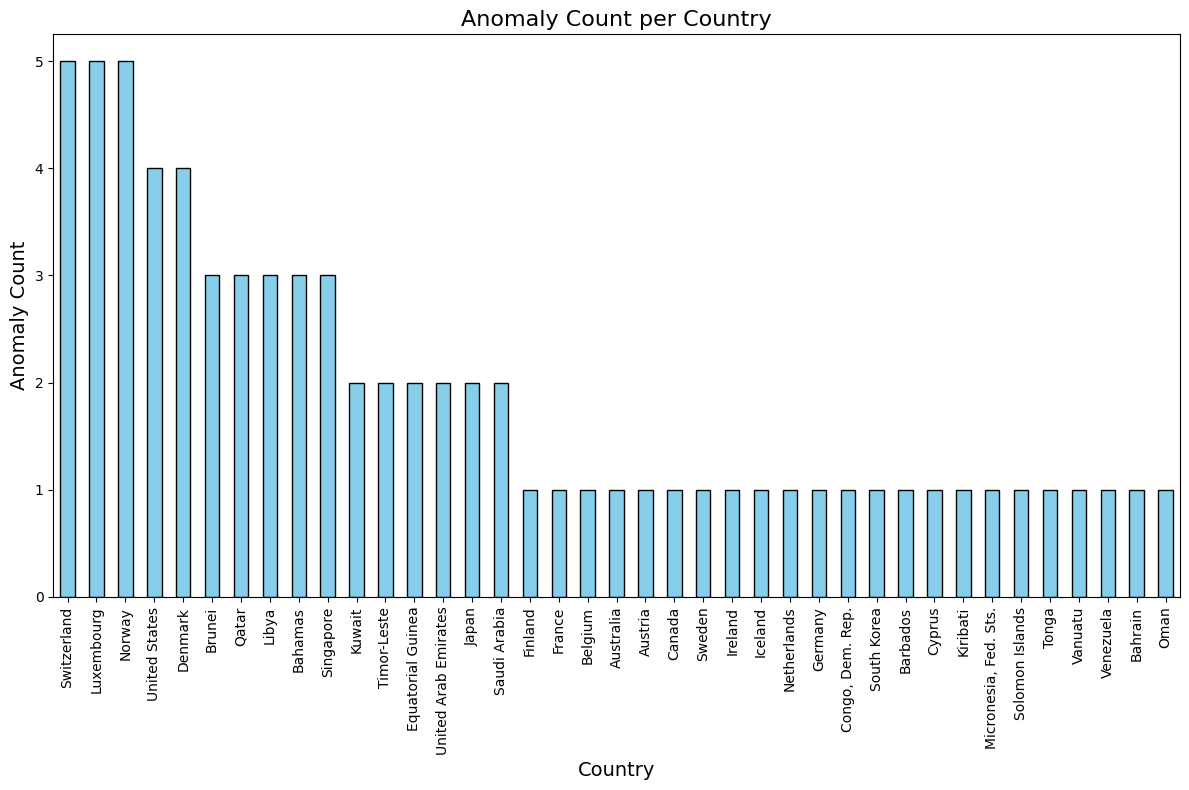

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800


None


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
mean,17.541026,54.279487,8.005128,51.282051,39408.692308,6.893846,76.123077,2.454359,35158.820513
std,26.812622,38.638883,3.608391,31.583556,26523.865636,9.778181,7.033995,1.286196,24695.282429


None


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809


None


In [14]:
# Prompt: Create a bar plot showing the count of anomalies detected per country across all methods, x-axis: country, y-axis: count of anomalies
import pandas as pd

import matplotlib.pyplot as plt

# Combine all anomaly dataframes into one
all_anomalies = pd.concat([
    envelope_anomalies['country'],
    kernel_density_anomalies['country'],
    ocsvm_anomalies['country'],
    lof_anomalies['country'],
    isoforest_anomalies['country']
])

# Count the occurrences of each country
anomaly_counts = all_anomalies.value_counts()

# Plot the bar plot
plt.figure(figsize=(12, 8))
anomaly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Anomaly Count per Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Anomaly Count', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

all_anomalies_df = pd.concat([
    envelope_anomalies,
    kernel_density_anomalies,
    ocsvm_anomalies,
    lof_anomalies,
    isoforest_anomalies
])

# Prompt: Remove duplicate entries based on country from all_anomalies_df
all_anomalies_df = all_anomalies_df.drop_duplicates(subset=['country']).sort_values(by='country')

print(display(all_anomalies_df))
# Prompt: Show the Mean and Standard Deviation of each feature in all_anomalies_df
anomaly_stats = all_anomalies_df.describe().loc[['mean', 'std']]
print(display(anomaly_stats))
# Prompt: Show the Mean and Standard Deviation of each feature in the original dataframe df
original_stats = df.describe().loc[['mean', 'std']]
print(display(original_stats))


## 2. Early-Stage Diabetes Risk Prediction

### 2.I. Load Dataset

In [252]:
# code source: https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
early_stage_diabetes_risk_prediction = fetch_ucirepo(id=529) 
  
# data (as pandas dataframes) 
X = early_stage_diabetes_risk_prediction.data.features 
y = early_stage_diabetes_risk_prediction.data.targets 
  
# metadata 
print(early_stage_diabetes_risk_prediction.metadata) 
  
# variable information 
print(early_stage_diabetes_risk_prediction.variables) 


{'uci_id': 529, 'name': 'Early Stage Diabetes Risk Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/529/data.csv', 'abstract': 'This dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient. ', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 520, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Gender'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5VG8H', 'creators': [], 'intro_paper': {'ID': 397, 'type': 'NATIVE', 'title': 'Likelihood Prediction of Diabetes at Early Stage Using Data Mining Techniques', 'authors': 'M. M. F. Islam, Rahatara Ferdousi, Sadikur Rahman, Humayra Yas

### 2.II. Encoding, and Dataset Split

<mark class="question"> Item 2.a. Make the necessary encoding for categorical inputs. Split the data into 80% Training and 20% Testing with stratification. 


In [253]:
# Encode categorical variables
from sklearn.calibration import LabelEncoder


X = pd.get_dummies(X, drop_first=True)
# Encode y

le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets (stratify = y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


c:\Users\jhon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 2.III. Best Model Using 

<mark class="question"> Item 2.b. Using Optuna, find the best model between the MLP Classifier, Random Forest Classifier, XGBoost Classifier, Logistic Regression, Naïve Bayes Classifier, SVM Classifier (SVC), and kNN Classifier. Set Optuna to maximize the 10-fold cross-validation score (cross_val_score). You are free to design the search space for hyper-parameters in these models.

In [254]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", 
                                                 ["MLP", "RandomForest", "XGBoost", "LogisticRegression", "NaiveBayes", "SVM", "kNN"])
    
    if classifier_name == "MLP":
        hidden_layer_sizes_choices = ["(50,)", "(100,)", "(50, 50)"]
        params = {
            "hidden_layer_sizes": eval(trial.suggest_categorical("hidden_layer_sizes", hidden_layer_sizes_choices)),
            "activation": trial.suggest_categorical("activation", ["relu", "tanh"]),
            "solver": trial.suggest_categorical("solver", ["adam", "sgd"]),
            "alpha": trial.suggest_float("alpha", 1e-5, 1e-1, log=True),
        }
        model = MLPClassifier(**params, max_iter=1000, random_state=42, early_stopping=True)
    
    elif classifier_name == "RandomForest":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 300, step=50),
            "max_depth": trial.suggest_int("max_depth", 3, 20),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        }
        model = RandomForestClassifier(**params, random_state=42)
    
    elif classifier_name == "XGBoost":
        params = {
            "max_depth": trial.suggest_int("max_depth", 3, 15),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "n_estimators": trial.suggest_int("n_estimators", 50, 300, step=50),
        }
        model = XGBClassifier(**params, eval_metric="logloss", random_state=42)
    
    elif classifier_name == "LogisticRegression":
        params = {
            "C": trial.suggest_float("C", 1e-3, 1e3, log=True),
            "solver": trial.suggest_categorical("k-solver", ["liblinear", "lbfgs"]),
        }
        model = LogisticRegression(C=params["C"], solver=params["solver"], max_iter=1000, random_state=42)
    
    elif classifier_name == "NaiveBayes":
        model = GaussianNB()
    
    elif classifier_name == "SVM":
        params = {
            "C": trial.suggest_float("C", 1e-3, 1e3, log=True),
            "kernel": trial.suggest_categorical("kernel", ["linear", "rbf", "poly"]),
        }
        model = SVC(**params, random_state=42)
    
    elif classifier_name == "kNN":
        params = {
            "n_neighbors": trial.suggest_int("n_neighbors", 3, 15),
            "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),
        }
        model = KNeighborsClassifier(**params)
    
    # Perform 10-fold cross-validation
    score = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy").mean()
    return score

# Create and run the Optuna study
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=500, show_progress_bar=True)

# Get the best model and hyperparameters
best_params = study.best_params
best_classifier = best_params.pop("classifier")

if best_classifier == "MLP":
    hidden_layer_sizes = eval(best_params["hidden_layer_sizes"])
    best_model = MLPClassifier(**best_params,  max_iter=1000, random_state=42, early_stopping=True)
elif best_classifier == "RandomForest":
    best_model = RandomForestClassifier(**best_params, random_state=42)
elif best_classifier == "XGBoost":
    best_model = XGBClassifier(**best_params, eval_metric="logloss", random_state=42)
elif best_classifier == "LogisticRegression":
    best_model = LogisticRegression(C=best_params["C"], solver=best_params["k-solver"], random_state=42)
elif best_classifier == "NaiveBayes":
    best_model = GaussianNB()
elif best_classifier == "SVM":
    best_model = SVC(**best_params, random_state=42)
elif best_classifier == "kNN":
    best_model = KNeighborsClassifier(**best_params)

# Train the best model on the training data
best_model.fit(X_train, y_train)

# Evaluate on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Best Classifier: {best_classifier}")
print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {accuracy}")
print(f"Test F1-Score: {f1}")

[I 2025-12-02 14:19:00,879] A new study created in memory with name: no-name-54e2dc44-35b8-48b1-8599-895bebcc76ff


  0%|          | 0/500 [00:00<?, ?it/s]

[I 2025-12-02 14:19:02,923] Trial 0 finished with value: 0.9663182346109174 and parameters: {'classifier': 'RandomForest', 'n_estimators': 300, 'max_depth': 13, 'min_samples_split': 8}. Best is trial 0 with value: 0.9663182346109174.
[I 2025-12-02 14:19:04,334] Trial 1 finished with value: 0.9736353077816492 and parameters: {'classifier': 'RandomForest', 'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 4}. Best is trial 1 with value: 0.9736353077816492.
[I 2025-12-02 14:19:04,387] Trial 2 finished with value: 0.6153310104529617 and parameters: {'classifier': 'SVM', 'C': 1.2173252504194043, 'kernel': 'poly'}. Best is trial 1 with value: 0.9736353077816492.
[I 2025-12-02 14:19:04,419] Trial 3 finished with value: 0.9207317073170733 and parameters: {'classifier': 'LogisticRegression', 'C': 12.746711578215052, 'k-solver': 'liblinear'}. Best is trial 1 with value: 0.9736353077816492.
[I 2025-12-02 14:19:05,595] Trial 4 finished with value: 0.9664924506387921 and parameters: {'clas

<mark class="question"> Item 2.b. What is the Accuracy and F1-score on the Test Data of the best model?

<mark class="answer"> The best classifier is RandomForest (n_estimators=50, max_depth=17, min_samples_split=2), havning Test Accuracy of 98% and Test F1-Score of 98%.

### 2.IV. Random Forest 

This section focuses on the following; finding a better Random Forest through hyperparameter tuning, and comparison on paper's Best Random Forest.

<mark class="question"> Item 2.c. In the paper, the best model was found to be Random Forest, having a weighted average F1 score of 0.98. Using your own hyper-parameter search, can you find a better Random Forest model with higher F1 score? 

In [255]:



def objective_rf(trial):
    
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 200, step=1),
        "max_depth": trial.suggest_int("max_depth", 3, 50),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
    }
    model = RandomForestClassifier(**params, random_state=42)
    
    # Perform 10-fold cross-validation
    score = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy").mean()
    return score

# Create and run the Optuna study
study_rf = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42))
study_rf.optimize(objective_rf, n_trials=500, show_progress_bar=True)

# Get the best model and hyperparameters
best_params_rf = study_rf.best_params



best_model = RandomForestClassifier(**best_params_rf, random_state=42)

# Train the best model on the training data
best_model.fit(X_train, y_train)

# Evaluate on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {accuracy}")
print(f"Test F1-Score: {f1}")

[I 2025-12-02 14:26:01,075] A new study created in memory with name: no-name-4dd65e45-eeb8-41fa-8993-05b2c30eba4d


  0%|          | 0/500 [00:00<?, ?it/s]

[I 2025-12-02 14:26:01,987] Trial 0 finished with value: 0.9639372822299652 and parameters: {'n_estimators': 81, 'max_depth': 48, 'min_samples_split': 8}. Best is trial 0 with value: 0.9639372822299652.
[I 2025-12-02 14:26:03,485] Trial 1 finished with value: 0.9783972125435539 and parameters: {'n_estimators': 124, 'max_depth': 10, 'min_samples_split': 3}. Best is trial 1 with value: 0.9783972125435539.
[I 2025-12-02 14:26:03,783] Trial 2 finished with value: 0.9639372822299652 and parameters: {'n_estimators': 21, 'max_depth': 44, 'min_samples_split': 7}. Best is trial 1 with value: 0.9783972125435539.
[I 2025-12-02 14:26:05,394] Trial 3 finished with value: 0.9061556329849012 and parameters: {'n_estimators': 145, 'max_depth': 3, 'min_samples_split': 10}. Best is trial 1 with value: 0.9783972125435539.
[I 2025-12-02 14:26:07,433] Trial 4 finished with value: 0.9783972125435539 and parameters: {'n_estimators': 168, 'max_depth': 13, 'min_samples_split': 3}. Best is trial 1 with value: 0.

<mark class="question"> Item 2.c. Using your own hyper-parameter search, can you find a better Random Forest model with higher F1 score? 

<mark class="answer"> A better Random Foreset Model with higher F1 score has parameters of n_estimators=50, max_depth=17, and min_samples_split=2. 

In [256]:

categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns

['age']

<mark class="question"> Item 2.d. Based on the best Random Forest model in item (c), perform any feature importance method to explain the model. What insights can we get from the model?

<mark class="answer"> The results indicate that the top three features significantly influencing the model's performance are: polyuria_Yes, polydipsia_Yes, and gender_Male. These features play a critical role in the model's predictions and provide valuable insights into the factors driving its performance.

In [263]:

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1, encoded_missing_value=-1
)
numerical_pipe = SimpleImputer(strategy="mean")

preprocessing = ColumnTransformer(
    [
       
        ("num", numerical_pipe, numerical_columns),
    ],
    verbose_feature_names_out=False,
)

rf = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", RandomForestClassifier(**best_params_rf, random_state=42)),
    ]
)
rf.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [264]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(best_model, X_test, y_test, scoring="f1_weighted")

# Create a DataFrame for better visualization
perm_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot the permutation importance
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df["Feature"], perm_importance_df["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Permutation Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

ValueError: Classification metrics can't handle a mix of binary and continuous targets

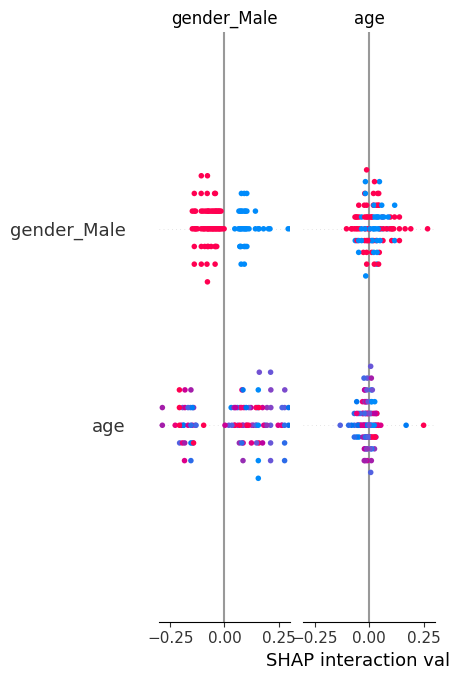

In [259]:
import shap

# Create a SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Summary plot for global feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed plot for individual predictions

RandomForestClassifier(max_depth=17, n_estimators=20, random_state=42)


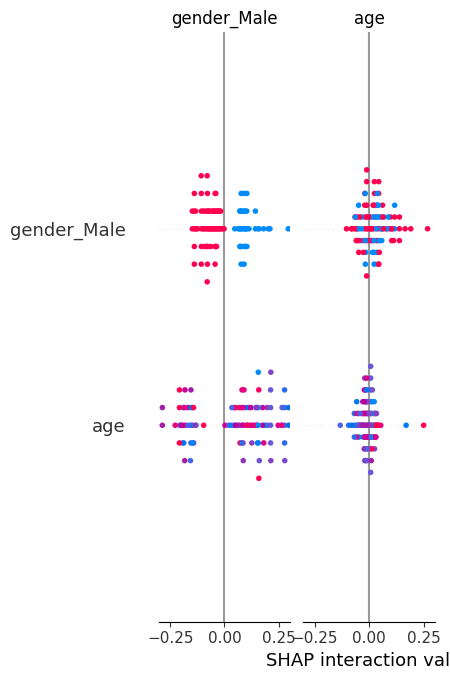

In [260]:
import shap

print(best_model)

# The next few lines help us apply SHAP values on a Pipeline model
explainer = shap.TreeExplainer(best_model)
observations = X_test
shap_values = explainer.shap_values(observations)

# Plot the feature importance using SHAP
shap.summary_plot(shap_values, X_test, plot_type="bar")


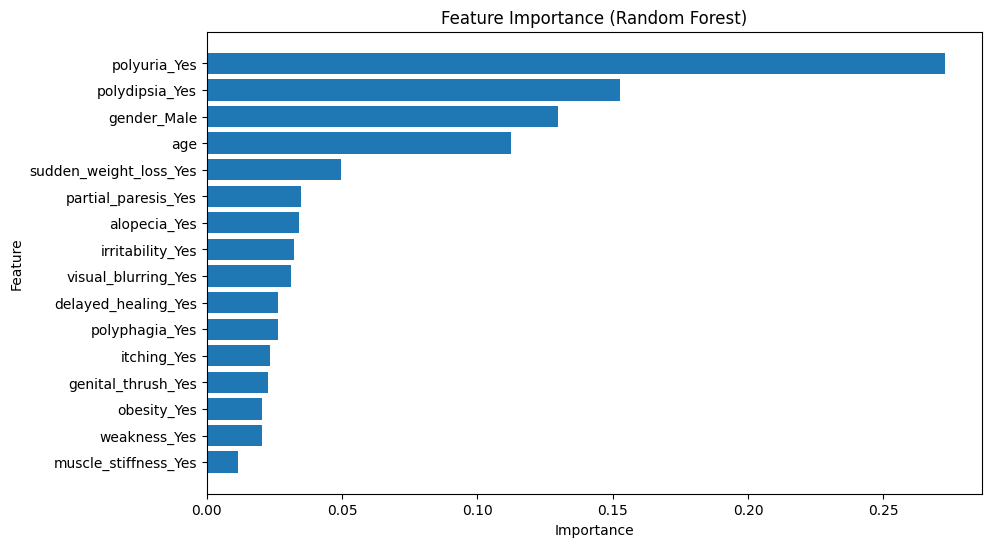

In [261]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from the trained Random Forest model
importances = best_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

In [262]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, accuracy_score

alphas = np.logspace(-3, 3, 10)
best_alpha = None
best_val_score = -np.inf
best_model = None

X_val = X_test
y_val = y_test
for alpha in alphas:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha))
    ])
    pipe.fit(X_train, y_train)
    val_pred = pipe.predict(X_val)
    val_score = r2_score(y_val, val_pred)
    if val_score > best_val_score:
        best_val_score = val_score
        best_alpha = alpha
        best_model = pipe

# Final evaluation
train_score =  r2_score(y_train, best_model.predict(X_train))
test_score = r2_score(y_test, best_model.predict(X_test))

ridge = best_model.named_steps['ridge']

# Get the feature names for X1 to X8
feature_names = np.array(X.columns[:8])

# Get absolute value of coefficients for the best Ridge model
coef_abs = np.abs(ridge.coef_[:8])

# Get indices of top 5 features
top5_idx = np.argsort(coef_abs)[-5:][::-1]
top5_features = feature_names[top5_idx]

print("Top 5 features among X1 to X8:", list(top5_features))


Top 5 features among X1 to X8: ['polyuria_Yes', 'polydipsia_Yes', 'gender_Male', 'genital_thrush_Yes', 'sudden_weight_loss_Yes']
